In [ ]:
#As we dont have any GPU we will be using google collab for GPU usage
#Mout at drive 
import sys
from google.colab import drive
from pathlib import Path
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
!pip install langdetect


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
     |████████████████████████████████| 981 kB 6.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=32854c9338b8a4da3dfc481a364743f92fe270e299d0f4f38d7f2ce88004bd5e
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import string
from langdetect import detect
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing"
df = pd.read_csv(path+"/dataset/created/finalDf.csv",usecols=['text','label'])
df.head(5)

,text,label
0,always made me feel worthless but all of a sud...,1
1,closer to killing myself everyday famsquad 💦 b...,1
2,you know when life hits you hard and about kno...,1
3,the replies actually make me sick “he should e...,1
4,it’s easier being alone but i’m tired of being...,1


In [ ]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (49178, 2)
Columns are: Index(['text', 'label'], dtype='object')


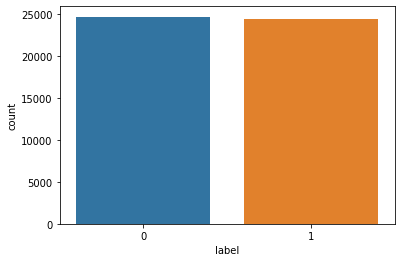

In [ ]:
sns.countplot(x = 'label', data = df)

In [ ]:
tagging_regex = re.compile(r"@\S*")
url_pattern = re.compile(r'https?://\S+|www\.\S+')
# signature_pattern = re.compile(r"-\S*")
weird_thing_pattern = re.compile(r"\^\S*")
new_line_pattern = re.compile(r"\n+\S*")

chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait",
    "IMMA": "I am going to",
    "2NITE": "tonight",
    "DMED": "mesaged",
    'DM': "message",
    "SMH": "I am dissapointed"
}

contractions = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he shall have / he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
}



In [ ]:
def remove_emoji(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')


def remove_url(string):
    return url_pattern.sub(r'', string)

def remove_chat_words_and_contractions(string):
    new_text = []
    for word in string.split(' '):
        if word.upper() in chat_words.keys():
            new_text += chat_words[word.upper()].lower().split(' ')
        if word.lower() in contractions.keys():
            new_text += contractions[word.lower()].split(' ')
        else:
            new_text.append(word)
            
    return ' '.join(new_text)

# def remove_signature(text):
#     return signature_pattern.sub(r'', text)
    

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))



In [ ]:
def clean_message(message):
    # Remove user taggings
    message = re.sub(tagging_regex, '', message)
    
    # Remove the emojis
    message = remove_emoji(message)
    
    # Remove urls
    message = remove_url(message)
    
    # Remove signatures
    message = remove_signature(message)
    
    # Remove the chat words and contractions
    message = remove_chat_words_and_contractions(message)
    
    # Remove weird things
    message = weird_thing_pattern.sub(r'', message)

    # Change new line to dot
    message = new_line_pattern.sub(r'.', message)
    
    # Remove punctuation
    message = remove_punctuation(message)
    
    # Remove start and end whitespace
    message = message.strip()
    
    # Make multiple spaces become a single space
    message = ' '.join(message.split())
    
    # Lower case the message
    message = message.lower()
    
    return message

df['cleaned_text'] = df.apply(lambda row: clean_message(row['text']), axis=1)

In [ ]:
print("before cleaning tweets")
print(df.text[1])
print("After cleaning tweets")
print(df.cleaned_text[1])


before cleaning tweets
closer to killing myself everyday famsquad 💦 but that means im also closer to jesus ✊ 
After cleaning tweets
closer to killing myself everyday famsquad but that means im also closer to jesus


In [ ]:
# df[df['cleaned_text'].str.contains("1")]
def remove_numbers(text):
    text = re.sub('[0-9]+', '', text)
    return text

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_numbers(x))
# df[df['cleaned_text'].str.contains("1")]

In [ ]:
stop_words = stopwords.words('english')

# Remove stop words
df['cleaned_text'] = df['cleaned_text'].str.split().apply(lambda x: [word for word in x if word not in stop_words]).apply(lambda x: ' '.join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print("before removieing stopwords: ",df['text'][1])
print("After removieing stopwords: ",df['cleaned_text'][1])

before removieing stopwords:  closer to killing myself everyday famsquad 💦 but that means im also closer to jesus ✊ 
After removieing stopwords:  closer killing everyday famsquad means im also closer jesus


In [ ]:
#frequent words

cnt = Counter()
for text in df["cleaned_text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('want', 21567),
 ('dont', 14247),
 ('life', 13448),
 ('im', 11151),
 ('like', 11130),
 ('know', 7801),
 ('people', 7296),
 ('end', 7172),
 ('get', 6976),
 ('feel', 6599)]

In [ ]:
#rare words
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["cleaned_text"] = df["cleaned_text"].apply(lambda text: remove_rarewords(text))

In [ ]:
print("Before lemmatization : ",df['cleaned_text'][1])

Before lemmatization :  closer killing everyday famsquad means im also closer jesus


In [ ]:


lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["cleaned_text"] = df["cleaned_text"].apply(lambda text: lemmatize_words(text))

print("After lemmatization : ",df['cleaned_text'][1])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
After lemmatization :  closer kill everyday famsquad mean im also closer jesus


(-0.5, 399.5, 199.5, -0.5)

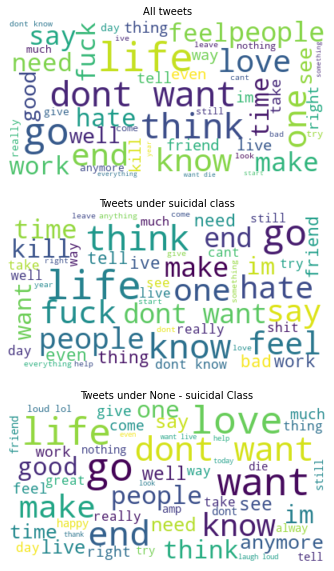

In [ ]:

tweet_df = df.copy()
# Start with one review:
df_ADR = tweet_df[tweet_df['label']==1]
df_NADR = tweet_df[tweet_df['label']==0]
tweet_All = " ".join(review for review in df.cleaned_text)
tweet_ADR = " ".join(review for review in df_ADR.cleaned_text)
tweet_NADR = " ".join(review for review in df_NADR.cleaned_text)

fig, ax = plt.subplots(3, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All tweets', fontsize=10)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Tweets under suicidal class',fontsize=10)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Tweets under None - suicidal Class',fontsize=10)
ax[2].axis('off')


In [ ]:
# df.to_csv(path+'/dataset/created/cleaned_df.csv',index=False)

In [ ]:
df = pd.read_csv(path + '/dataset/created/cleaned_df.csv')

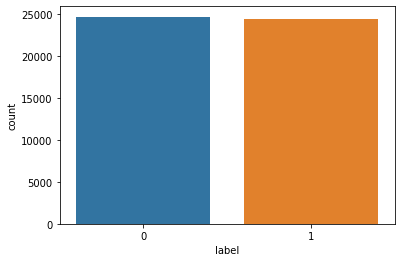

In [ ]:
sns.countplot(data= df, x= 'label',
             order = df['label'].value_counts().index);

In [ ]:
df['text_n_chars'] = df.text.apply(len) # count all chars in each sentence
df['text_n_words'] = df.text.apply(lambda sent: len(sent.split())) # count number of words in each sentence
df.head()

,text,label,cleaned_text,text_n_chars,text_n_words
0,always made me feel worthless but all of a sud...,1,always make feel worthless sudden im problem,65,13
1,closer to killing myself everyday famsquad 💦 b...,1,closer kill everyday famsquad mean im also clo...,86,16
2,you know when life hits you hard and about kno...,1,know life hit hard knock fuck thats rn like ta...,190,39
3,the replies actually make me sick “he should e...,1,reply actually make sick end yet theyll first ...,146,28
4,it’s easier being alone but i’m tired of being...,1,easy alone im tire alone,52,10
